<a href="https://colab.research.google.com/github/BonfaTex/DeepL-1/blob/main/notebooks/Create_new_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks and Deep Learning

---

## Homework 1: Create new dataset

## 🌐 Connect Colab to Google Drive

In [ ]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/My Drive/DeepL/Homework 1/DeepL Team/Matteo

Mounted at /gdrive
/gdrive/My Drive/DeepL/Homework 1/DeepL Team/Matteo


## ⚙️ Import Libraries

In [ ]:
%%capture
pip install keras-cv

In [ ]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import requests
from io import BytesIO
import cv2
from PIL import Image
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from tensorflow.keras import mixed_precision

import keras_cv
from keras_cv.layers import AugMix, RandAugment

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

2.17.1


## ⏳ Load the Data

In [ ]:
data=np.load('../training_set.npz') # Load the training data here
images=data['images']
labels=data['labels']
del data # Free memory

In [ ]:
print('Target shape', labels.shape)

# Calculate the unique target labels and their counts
unique, count = np.unique(labels, return_counts=True)
print('Target labels:', unique)
for u in unique:
    print(f'Class {unique[u]} has {count[u]} samples')

Target shape (13759, 1)
Target labels: [0 1 2 3 4 5 6 7]
Class 0 has 1052 samples
Class 1 has 2381 samples
Class 2 has 1285 samples
Class 3 has 2226 samples
Class 4 has 1049 samples
Class 5 has 1393 samples
Class 6 has 2530 samples
Class 7 has 1843 samples


## 📤 Outliers

In [ ]:
# Deleting obvious outliers (200 for each class)
images=images[0:11959]
labels=labels[0:11959]

In [ ]:
print('Target shape', labels.shape)

# Calculate the unique target labels and their counts
unique, count = np.unique(labels, return_counts=True)
print('Target labels:', unique)
for u in unique:
    print(f'Class {unique[u]} has {count[u]} samples')

Target shape (11959, 1)
Target labels: [0 1 2 3 4 5 6 7]
Class 0 has 852 samples
Class 1 has 2181 samples
Class 2 has 1085 samples
Class 3 has 2026 samples
Class 4 has 849 samples
Class 5 has 993 samples
Class 6 has 2330 samples
Class 7 has 1643 samples


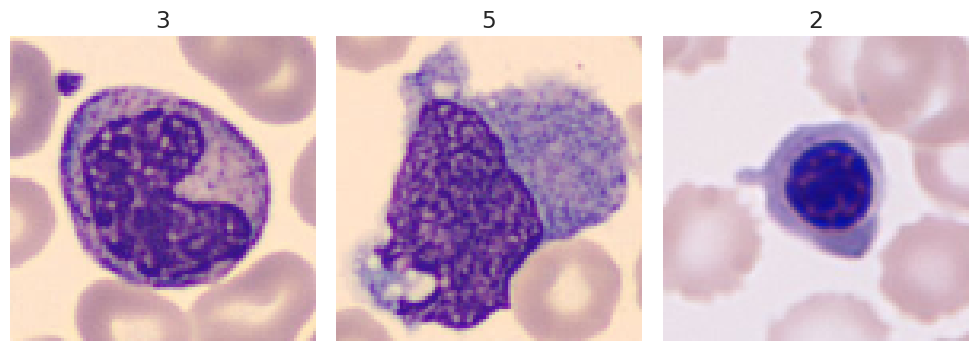

In [ ]:
# Display a sample of images from the dataset
num_img = 3
random_indices = random.sample(range(len(images)), num_img)
fig, axes = plt.subplots(1, num_img, figsize=(10, 10))
# Iterate through the selected number of images
for i, idx in enumerate(random_indices):
    ax = axes[i % num_img]
    ax.imshow(np.squeeze(images[idx]), vmin=0., vmax=1.)
    ax.set_title(f'{labels[idx][0]}')
    ax.axis('off')
# Adjust layout and display the images
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from scipy.spatial.distance import mahalanobis

# Appiattimento delle immagini
flattened_images = images.copy().reshape((images.shape[0], -1))

# Applico PCA
pca = PCA(n_components=6)
pca_result = pca.fit_transform(flattened_images)

# Calcolo la distanza di Mahalanobis
mean = np.mean(pca_result, axis=0)
cov_inv = np.linalg.inv(np.cov(pca_result, rowvar=False))
distances = [mahalanobis(x, mean, cov_inv) for x in pca_result]

# Trovo gli indici degli outliers
threshold = np.percentile(distances, 98)
outliers_indices = np.where(distances > threshold)[0]

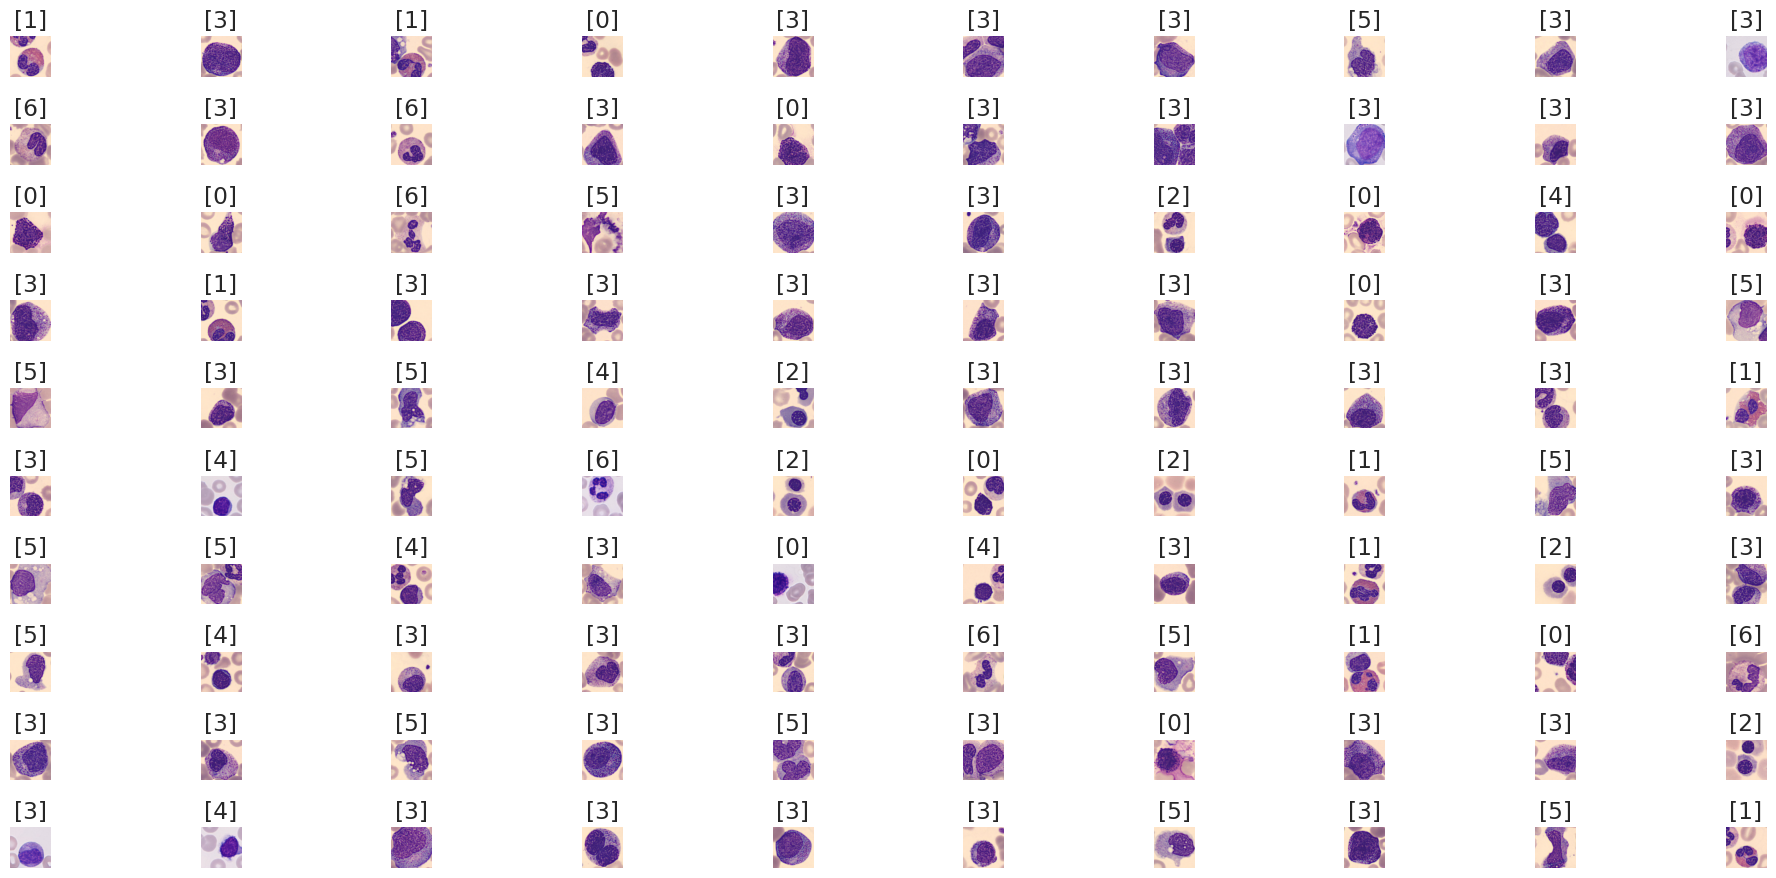

In [ ]:
# Display Outliers
num_img = 10
fig, axes = plt.subplots(10, num_img , figsize=(20, 9))
for i in range(num_img*10):
    ax = axes[i//num_img, i%num_img]
    idx = outliers_indices[i]
    ax.imshow(images[idx])
    ax.set_title(labels[idx])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
trololo_shrek_indices = []
for i in range(len(images)):
  if( ( images[i][0][0].sum()==images[338][0][0].sum() ) or ( images[i][0][0].sum()==images[58][0][0].sum() ) ):
    trololo_shrek_indices.append(i)
trololo_shrek_indices = np.array(trololo_shrek_indices)
print(trololo_shrek_indices)

[   58   139   219   234   338   377   470   706   745   790   821   982
  1011  1023  1136  1179  1281  1533  1735  1747  1752  1774  1813  1824
  2278  2511  2567  2670  2686  2769  2882  3168  3318  3341  3351  3379
  3403  3405  3423  3544  3720  3805  3812  3880  4026  4035  4054  4103
  4139  4227  4386  4870  4941  4973  5148  5242  5352  5362  5457  5463
  5539  5650  5919  5927  5972  6120  6407  6452  6578  6679  6869  6878
  6949  7092  7120  7126  7216  7389  7390  7446  7572  7627  7722  7724
  7747  7852  7919  8010  8023  8330  8360  8452  8496  8516  8577  8611
  8680  8689  8957  9150  9295  9328  9335  9348  9432  9546  9560  9753
  9759  9911 10024 10034 10119 10532 10683 10866 10910 10932 11052 11125
 11220 11311 11334 11429 11477 11594 11754]


In [ ]:
# Removing from dataset the outliers
indices_to_keep = np.setdiff1d(np.arange(images.shape[0]), trololo_shrek_indices )
images = images[indices_to_keep]

indices_to_keep = np.setdiff1d(np.arange(len(labels)), trololo_shrek_indices)
labels = labels[indices_to_keep]

In [ ]:
print('Target shape', labels.shape)

# Calculate the unique target labels and their counts
unique, count = np.unique(labels, return_counts=True)
print('Target labels:', unique)
for u in unique:
    print(f'Class {unique[u]} has {count[u]} samples')

Target shape (11832, 1)
Target labels: [0 1 2 3 4 5 6 7]
Class 0 has 838 samples
Class 1 has 2167 samples
Class 2 has 1075 samples
Class 3 has 2001 samples
Class 4 has 839 samples
Class 5 has 986 samples
Class 6 has 2299 samples
Class 7 has 1627 samples


## ➗ Split dataset

In [ ]:
data_train, data_val, labels_train, labels_val = train_test_split(
    images,
    labels,
    test_size=1832,
    random_state=seed,
    stratify=labels
)

# Convert labels to categorical format using one-hot encoding
labels_train = tfk.utils.to_categorical(labels_train)
labels_val = tfk.utils.to_categorical(labels_val)

input_shape = data_train.shape[1:]
print(f'Input shape of the network:\t {input_shape}')

output_shape = labels_train.shape[1]
print(f'Output shape of the network:\t {output_shape}')

# Print the shapes of the resulting sets
print('Training set shape:\t', data_train.shape, labels_train.shape)
print('Validation set shape:\t', data_val.shape, labels_val.shape)

Input shape of the network:	 (96, 96, 3)
Output shape of the network:	 8
Training set shape:	 (10000, 96, 96, 3) (10000, 8)
Validation set shape:	 (1832, 96, 96, 3) (1832, 8)


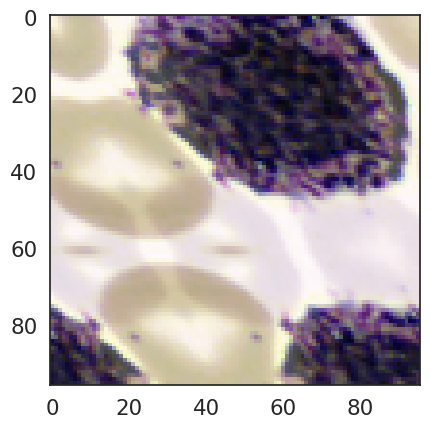

tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0.], shape=(8,), dtype=float64)


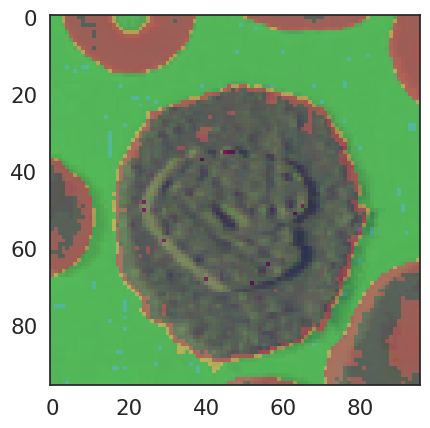

tf.Tensor([0. 0. 0. 1. 0. 0. 0. 0.], shape=(8,), dtype=float64)


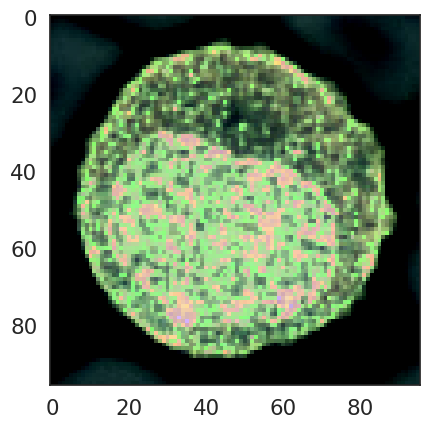

tf.Tensor([0. 0. 0. 1. 0. 0. 0. 0.], shape=(8,), dtype=float64)


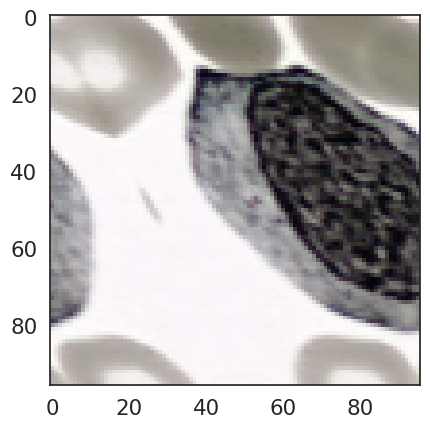

tf.Tensor([0. 0. 0. 1. 0. 0. 0. 0.], shape=(8,), dtype=float64)


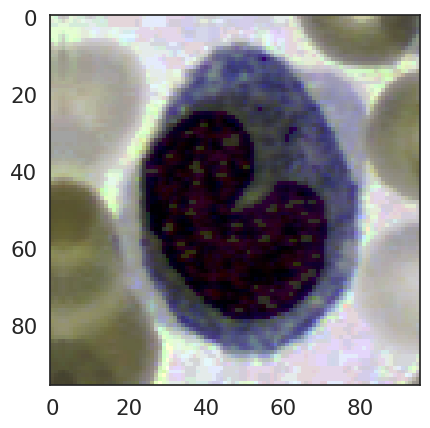

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0.], shape=(8,), dtype=float64)


In [ ]:
# Initialize AugMix and RandAugment layers from keras_cv
augmix = AugMix(
    value_range=(0,255),  # Value range for normalization
    num_chains=3,  # You can adjust the number of mixed augmentations
    severity=0.5,      # Severity of augmentation (range 0-1)
    alpha=1.0        # Alpha blending coefficient for mixing
)

randaugment = RandAugment(
    value_range=[0, 255],  # Value range for normalization
    augmentations_per_image=3,   # Number of random augmentations to apply
    magnitude=0.5     # Magnitude of augmentation (range 0-1)
)

# Create a function to apply both augmentations
def augment_data(X,y):
      X = augmix(X)  # Apply AugMix
      X = randaugment(X)  # Apply RandAugment()
      return X,y


# Example usage on a batch of your training data (data_train)
augmented_X_train = tf.data.Dataset.from_tensor_slices((data_train, labels_train))
augmented_X_train = (augmented_X_train.map(lambda x,y: augment_data(x,y), num_parallel_calls=tf.data.AUTOTUNE)
                     .batch(32)
                     .prefetch(tf.data.AUTOTUNE))

for images, labels in augmented_X_train.take(5):
    image=images[0]/255.0
    image=image.numpy().astype(np.float32)
    image=tf.clip_by_value(image, 0, 1)
    plt.imshow(image)
    plt.show()
    print(labels[0])

In [ ]:
aug_im=[]
aug_lab=[]

for images, labels in augmented_X_train:
  aug_im.append(images)
  aug_lab.append(labels)

aug_im=np.concatenate(aug_im)
aug_lab=np.concatenate(aug_lab)

In [ ]:
print(aug_im.shape)
print(aug_lab[0])

(10000, 96, 96, 3)
[1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
np.savez('../data_augmented.npz', images=aug_im, labels=aug_lab)
np.savez('../data_validation.npz', images=data_val, labels=labels_val)